In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1:<br>
### *i.)*<br><br>

Consider a linear regression problem of the form,<br><br>
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$

<br><br>Where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.<br><br>

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.<br><br>

We are interested in finding good parameters $\boldsymbol\theta$.

We start by defining the training set as a 5 x 1 vector, where N=5 (data points x in training set), and D=1 (dimensionality, i.e., number of rows in vector) using variables X and y in Numpy.<br><br>

Then, we plot the results.

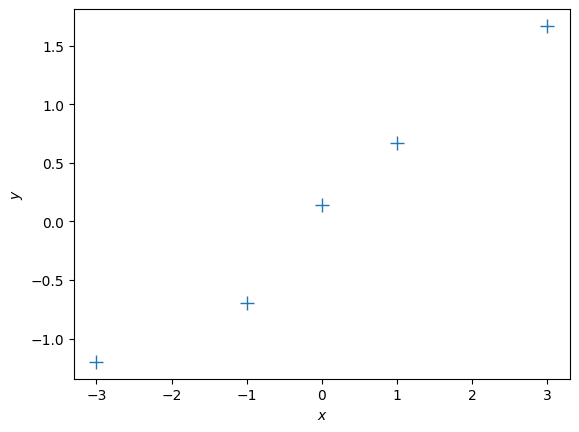

In [ ]:
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1)
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1)

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood<br><br>
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,
$$
<br><br>We know that the maximum likelihood estimator is given by<br><br>
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
<br><br>where<br><br>
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

<br><br>Computing for maximum likelihood estimate for a given training set:

In [ ]:
def max_lik_estimate(X, y):
    N, D = X.shape
    theta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return theta_ml

theta_ml = max_lik_estimate(X,y)

Making a prediction using the maximum likelihood estimate that we just found:

In [ ]:
def predict_with_estimate(Xtest, theta):
    prediction = Xtest @ theta
    return prediction

Check for useful output:

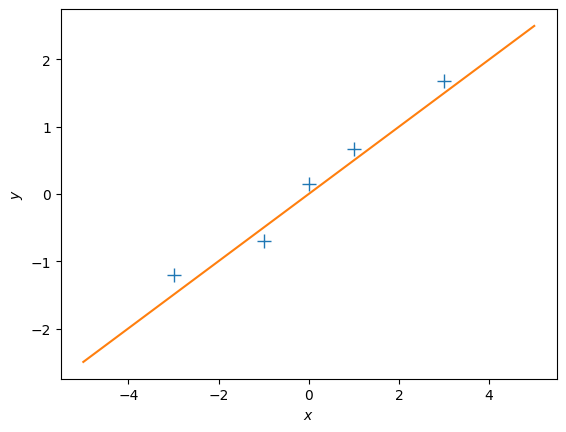

In [ ]:
Xtest = np.linspace(-5,5,100).reshape(-1,1)

ml_prediction = predict_with_estimate(Xtest, theta_ml)

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

### *ii.)*<br><br>

Suppose we add 2.0 to every $y$-value, and compute the maximum likelihood estimate:

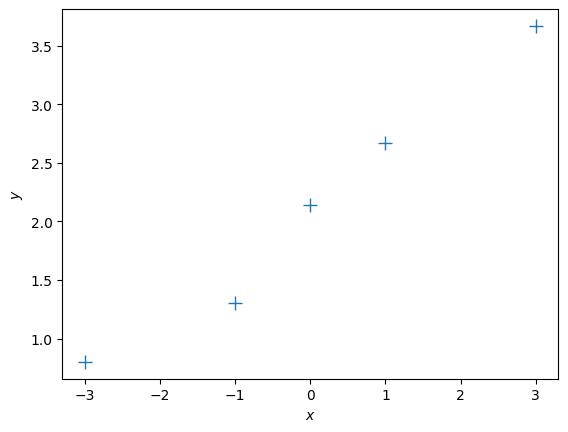

In [ ]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

Lets try applying our the previous solution:

[[0.499]]


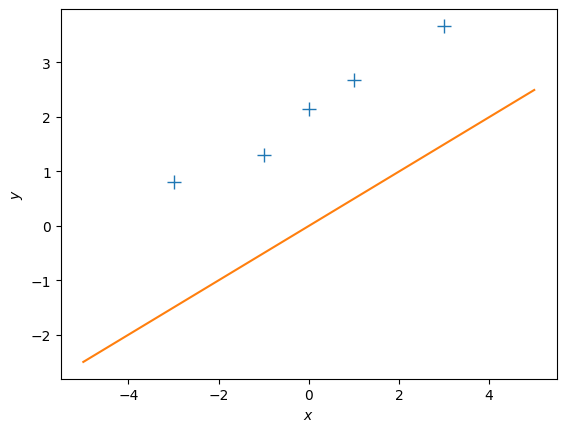

In [ ]:
theta_ml = max_lik_estimate(X, ynew)
print(theta_ml)

Xtest = np.linspace(-5,5,100).reshape(-1,1)

ml_prediction = predict_with_estimate(Xtest, theta_ml)

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

Its way off, so we neeed to adjust our solution.<br><br>
We should define a linear regression model that is slightly more flexible:<br><br>
$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$<br><br>
Here, we added an offset (bias) parameter $\theta_0$ to our original model.

If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as<br><br>
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,
$$

So, we augment training inputs of size N x (D+1) through X_aug, and theta vector of size (D+1) x 1 thorugh theta_aug

In [ ]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X])
theta_aug = np.zeros((D+1, 1))

Compute the maximum likelihood estimator for this setting:

In [ ]:
def max_lik_estimate_aug(X_aug, y):
    theta_aug_ml = max_lik_estimate(X_aug, y)
    return theta_aug_ml

theta_aug_ml = max_lik_estimate_aug(X_aug, y)

Try to predict again:

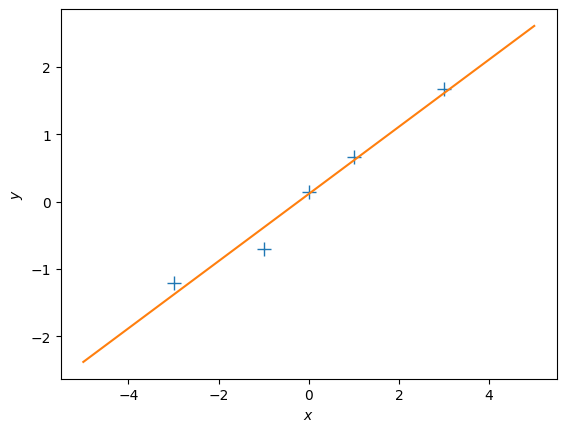

In [ ]:
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");